In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import joblib # importing the libraries
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
test_df=pd.read_csv('Malignant Test.csv')
train_df=pd.read_csv('Malignant Train.csv')

In [3]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [4]:
train_df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [6]:
test_df.isnull().sum()

id              0
comment_text    0
dtype: int64

In [7]:
train_df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


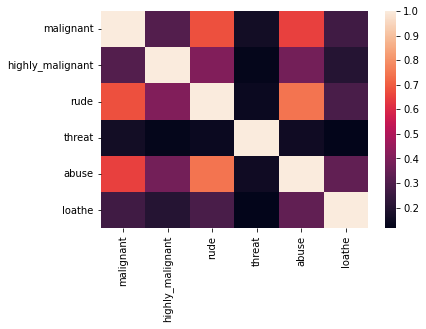

In [8]:
print(train_df.corr())
print(sns.heatmap(train_df.corr()))

In [9]:
# No correlation present

In [10]:
train_df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant
0    144277
1     15294
Name: malignant, dtype: int64


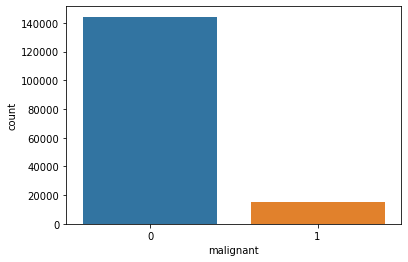

highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


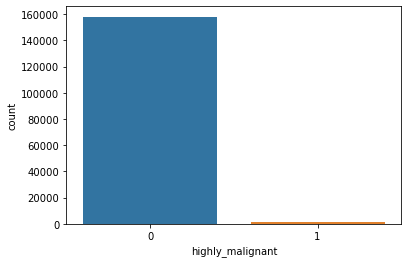

loathe
0    158166
1      1405
Name: loathe, dtype: int64


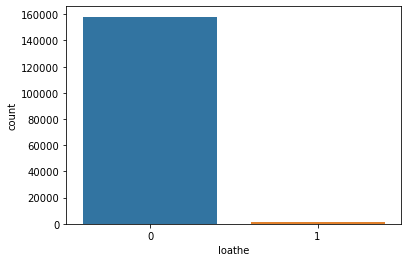

rude
0    151122
1      8449
Name: rude, dtype: int64


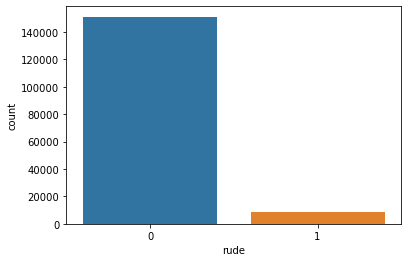

abuse
0    151694
1      7877
Name: abuse, dtype: int64


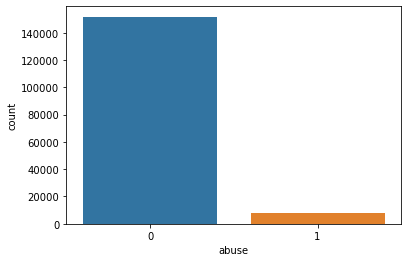

threat
0    159093
1       478
Name: threat, dtype: int64


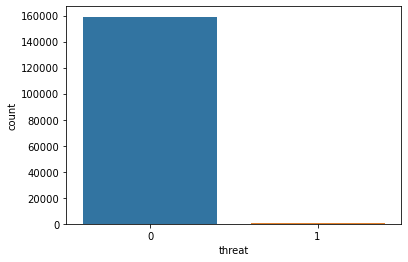

In [11]:
col = ['malignant', 'highly_malignant', 'loathe', 'rude', 'abuse', 'threat']
for i in col:
    print(i)
    print(train_df[i].value_counts())
    sns.countplot(train_df[i])
    plt.show()

In [12]:
# Replace email addresses with 'email'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')
# Remove punctuation
train_df['comment_text'] = train_df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [13]:
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\s+/\s+?$' , '')

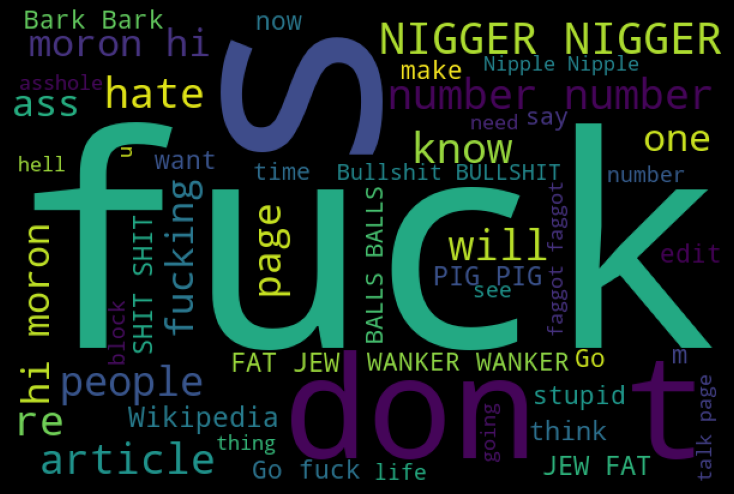

In [14]:
hams = train_df['comment_text'][train_df['malignant']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

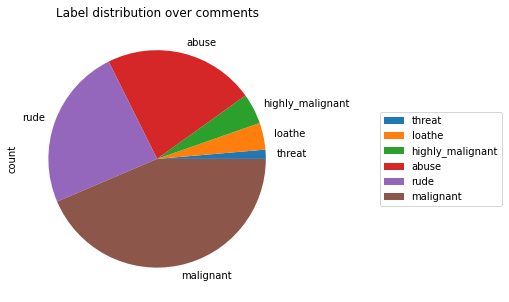

In [15]:
df_distribution = train_df[col].sum()\
                          .to_frame()\
                          .rename(columns={0: 'count'})\
                          .sort_values('count')
df_distribution.plot.pie(y = 'count', 
                         title = 'Label distribution over comments', 
                         figsize=(5,5))\
.legend(loc = 'center left', bbox_to_anchor = (1.3, 0.5))

In [16]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [25]:
x = train_df.drop(['malignant'],axis=1)
y = train_df['malignant']

In [26]:
naive = MultinomialNB()


In [27]:
tf_vec = TfidfVectorizer()

In [28]:
comment = train_df['comment_text']

In [29]:
x = tf_vec.fit_transform(comment)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)
naive.fit(x_train,y_train)

MultinomialNB()

In [31]:
y_pred = naive.predict(x_test)

In [32]:
joblib.dump(y_pred, "model")

['model']

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
Model=joblib.load("model")

In [36]:
Model

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
predictions=pd.DataFrame(Model)

In [41]:
predictions.to_csv("prediction_results.csv")